# Objective

To build a chatbot employing ML/DL techniques that can determine the accident level & potential level involved in any accident based on the text description.

# Problem Statement

Industrial accidents can turn depending on the type of industry.It is imperative to classify industrial incidents into different categories and determine whether the event was merely an accident, due to negligence or by incompetence. This avoids recurrences, reduce frequency of occurrence & severity and minimize the effects. To achieve this we employ exploratory data analysis on a dataset from one of the biggest Brazilian industries and find out the top reasons for industrial accidents, nature of accidents, type of employees being injured and so on. We also aim to develop a chatbot application using natural language processing to classify the accident into various critical risks by looking at the description of the accident.

# Dataset

This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

Columns description:
‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred 
(anonymised)

‣ Local: the city where the manufacturing plant is located 
(anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣ Gender: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing, Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database



# Importing Libraries

In [1]:
import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

import random, re
import time

# used to supress display of warnings
import warnings

import missingno as mno

from sklearn.feature_extraction.text import TfidfVectorizer

import holoviews as hv
from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import np_utils

from keras.layers import Input
from keras.layers.merge import Concatenate

from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
#  Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Loading Data and Cleansing

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
print("No of rows = {0} and No of Columns = {1}".format(data.shape[0], data.shape[1]))

No of rows = 425 and No of Columns = 11


In [6]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [7]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [8]:
# Checking unique values for categorical columns

columns = data[data.columns[~data.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

In [9]:
# Strealinging the data

rep = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(rep)
rep = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}
data['Accident Level'] = data['Accident Level'].map(rep)
rep = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5}
data['Potential Accident Level'] = data['Potential Accident Level'].map(rep)
del rep


In [10]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [11]:
# Checking for null values
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [12]:
# Editing the date field and adding year, month and day for further processing
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day_name())
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday


In [13]:
# Checking for duplicates

data.duplicated().sum()

7

In [14]:
# Dropping duplicates and checking revised dataset shape
data.drop_duplicates(inplace=True)
data.shape

(418, 13)

# Univariate and Multi variate Analysis

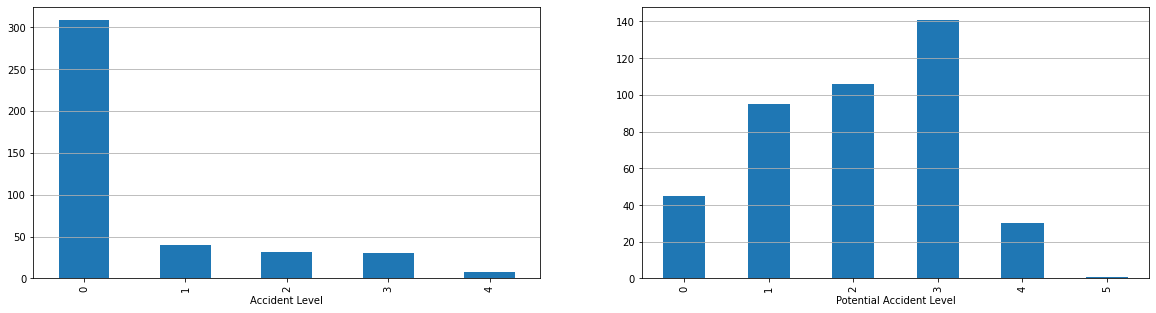

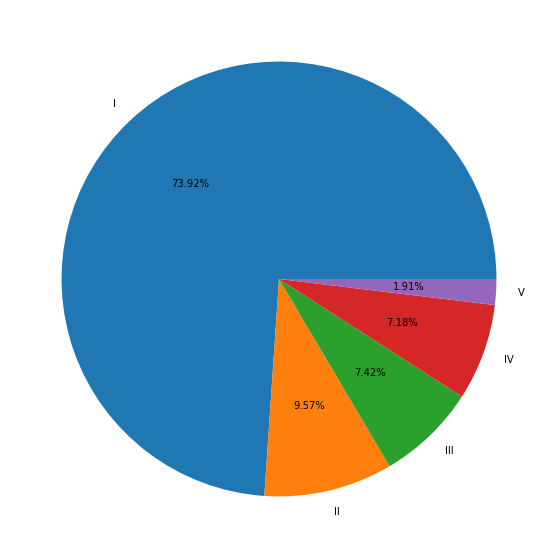

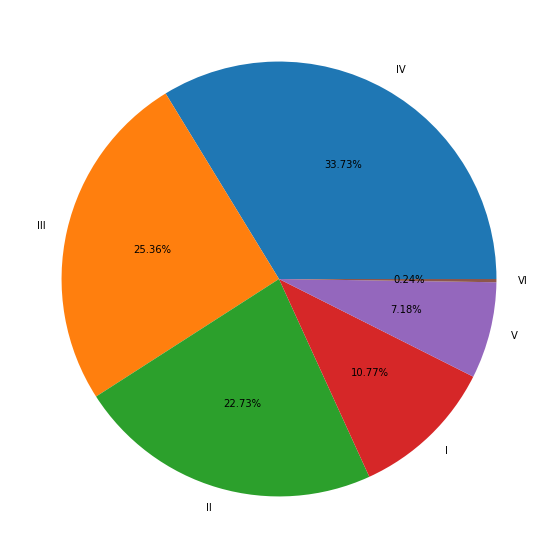

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[0]).grid(axis='y')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[1]).grid(axis='y')
plt.show()

plt.figure(figsize=(10,10))
plt.pie(data['Accident Level'].value_counts(), labels=['I', 'II', 'III' ,'IV' ,'V'], explode=(0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

plt.figure(figsize=(10,10))
plt.pie(data['Potential Accident Level'].value_counts(), labels=['IV','III','II','I','V','VI'], explode=(0,0,0,0,0,0),autopct = '%1.2f%%')
plt.show()


Accident level I is the most frequent accident level

Potential Accident level IV is the most frequent potential accident level

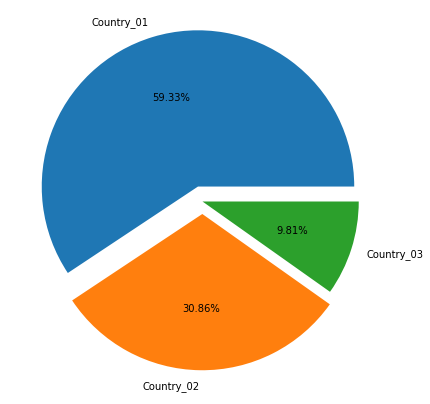

In [16]:
plt.figure(figsize=(7,10))
plt.pie(data['Country'].value_counts(), labels=['Country_01','Country_02','Country_03'], explode=(0.1,0.08,0),autopct = '%1.2f%%');

Country 01 contiruting to the maximum number of accidents

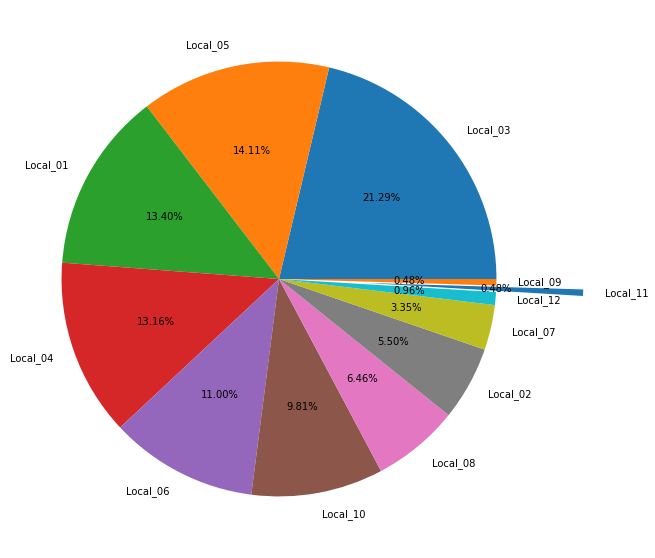

In [17]:
# Local wise split
plt.figure(figsize=(10,10))
plt.pie(data['Local'].value_counts(), labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'], 
                                                  explode=(0,0,0,0,0,0,0,0,0,0,0.4,0),autopct = '%1.2f%%')
plt.show()

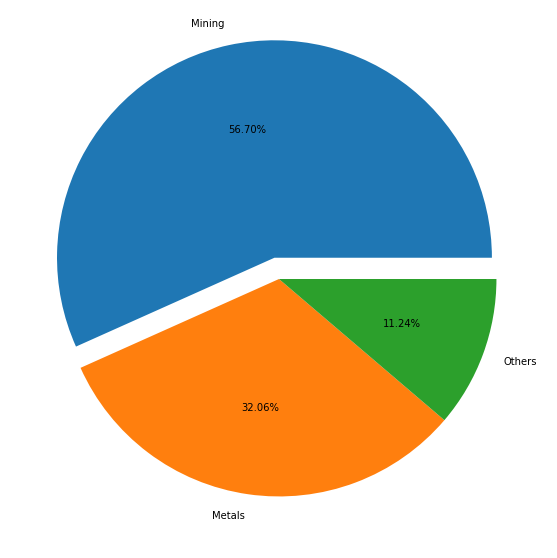

In [18]:
# Industry wise split
plt.figure(figsize=(10,10))
plt.pie(data['Industry Sector'].value_counts(), labels=['Mining', 'Metals', 'Others'], explode=(0.1,0,0),autopct = '%1.2f%%');

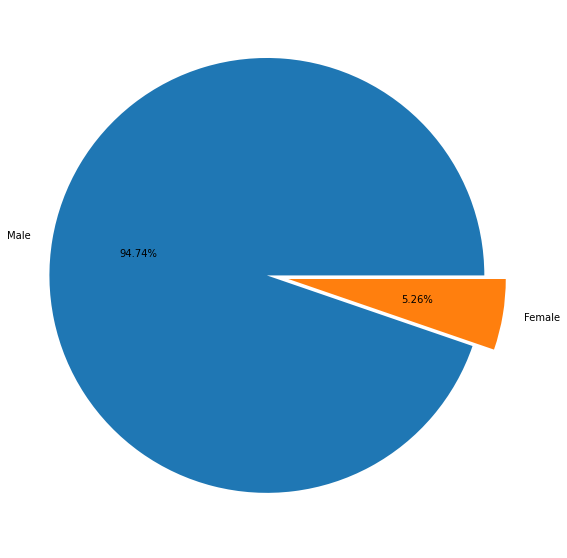

In [19]:
# Gender wise split
plt.figure(figsize=(10,10))
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0.1,0),autopct = '%1.2f%%');

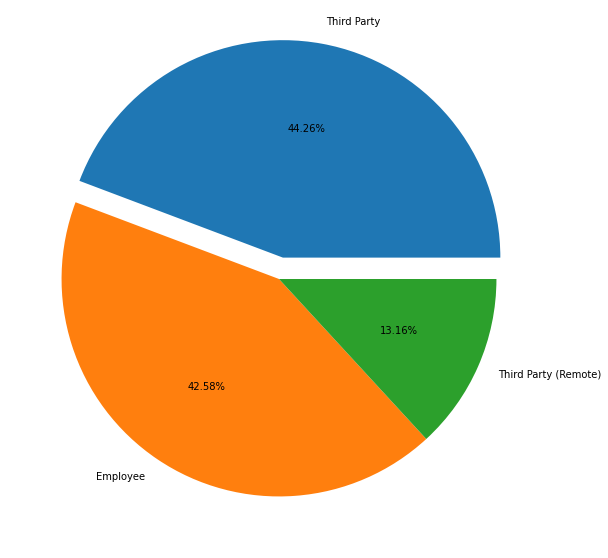

In [20]:
# Employee type wise split
plt.figure(figsize=(10,10))
plt.pie(data['Employee type'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'], explode=(0.1,0,0),autopct = '%1.2f%%');

Analysis of Industry Sector wrt Accident/ Potential Accident Level

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

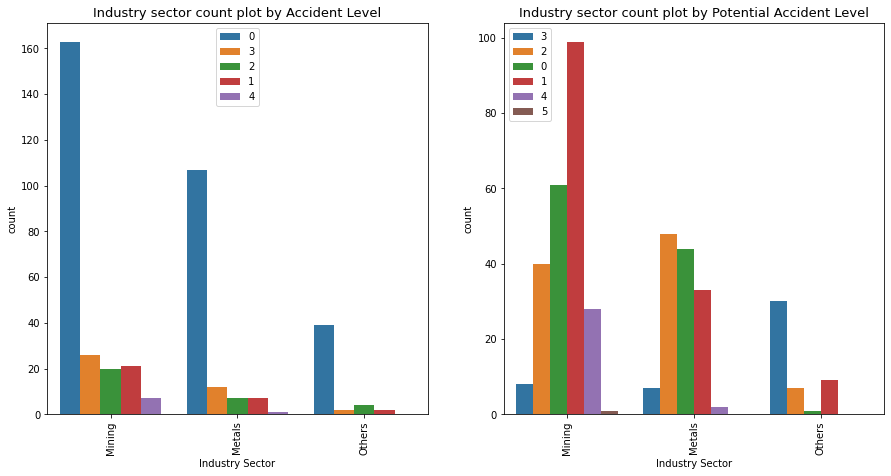

In [21]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Industry Sector', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Industry Sector' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

**Industry Sector Vs Accident Level**

Accident level I is highest in all industry sector (Mining, Metals and Other).

Most accidents happened in Mining industry sector.

Others industry sector has less accidents in comparision to other industries.

There are very few cases for Accident level 5.Others sector didn't reported any case for this level

**Industry Sector Vs Potential Accident Level:**

Potential Accident level 4 is highest in all industry sector (Mining, Metals and Others).

Most accidents happened in Mining industry sector.

Others industry sector has less accidents in comparision to other industries.

These are very few cases for Accident level 6.

Metals and Others sector didn;t reported case for this accident level

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

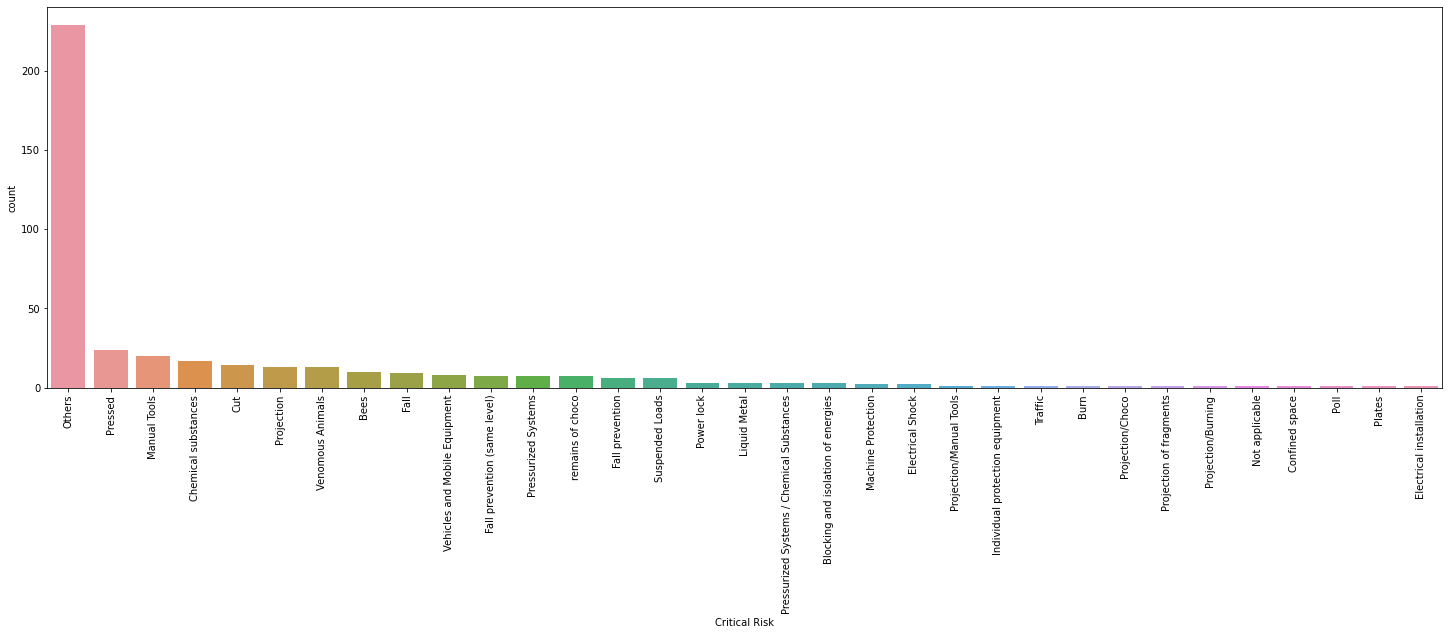

In [22]:
plt.figure(figsize=(25,7))
desc_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Critical Risk'],order=desc_order);
plt.xticks(rotation = 'vertical')

Highly imbalanced dataset as we can see from above with 'Others' forming the bulk of critical risk. 

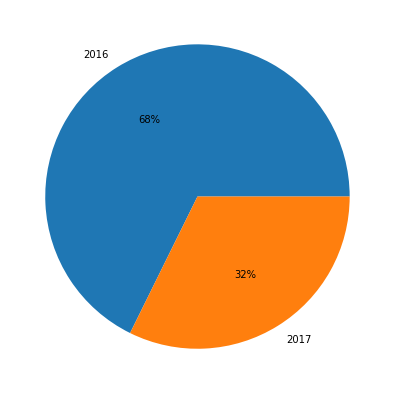

In [23]:
# Data split between two years

plt.figure(figsize=(7,7))
plt.pie(data['Year'].value_counts(), labels=['2016', '2017'], explode=(0,0),autopct = '%1.0f%%')

plt.show()

Bulk of the accidents has happened in 2016 with 68%.

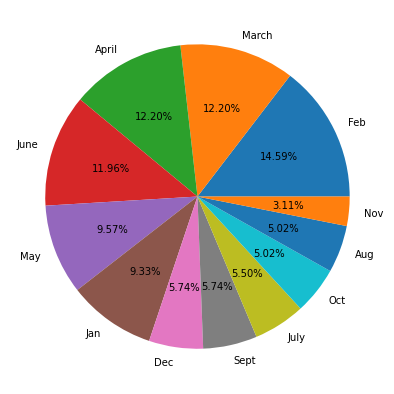

In [24]:
plt.figure(figsize=(7,7))
plt.pie(data['Month'].value_counts(), labels=['Feb', 'March','April', 'June','May', 'Jan','Dec', 'Sept','July', 'Oct','Aug', 'Nov'], explode=(0,0,0,0,0,0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

Feb, Mar, Apr & June contribute to almost 50% of the accidents. 

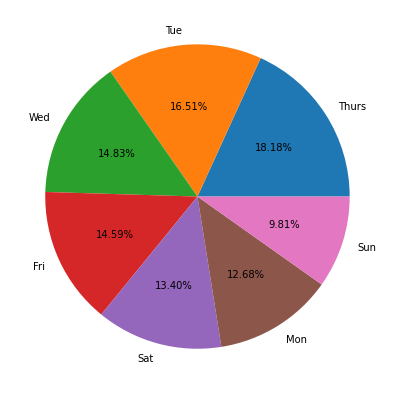

In [25]:
plt.figure(figsize=(7,7))
plt.pie(data['Day'].value_counts(), labels=['Thurs', 'Tue','Wed', 'Fri','Sat', 'Mon','Sun'], explode=(0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

Data looks fairly balanced in the day wise split. Nothing to differentiate one day from another.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

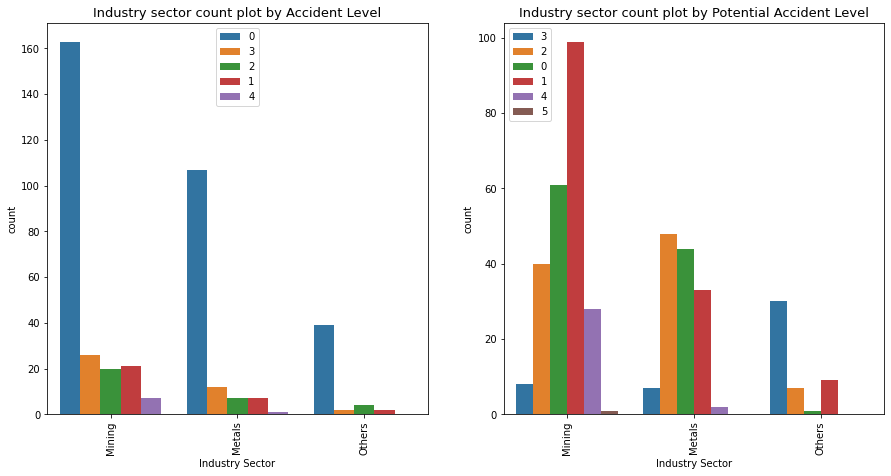

In [26]:
# Industry wide split of Accident and Potential accident level

fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Industry Sector', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Industry Sector' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

**Industry Sector Vs Accident Level**

Accident level 0 is highest in all industry sector (Mining, Metals and Other).

Most accidents happened in Mining industry sector.

There are very few cases for Accident level 4.

Others sectors didn't report any case at this level

**Industry Sector Vs Potential Accident Level**

Potential Accident level 5 is highest in all industry sector (Mining, Metals and Others).

Most accidents happened in Mining industry sector.

These are very few cases for Accident level 6.

Metals and Others sector didnt report any case at this level

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

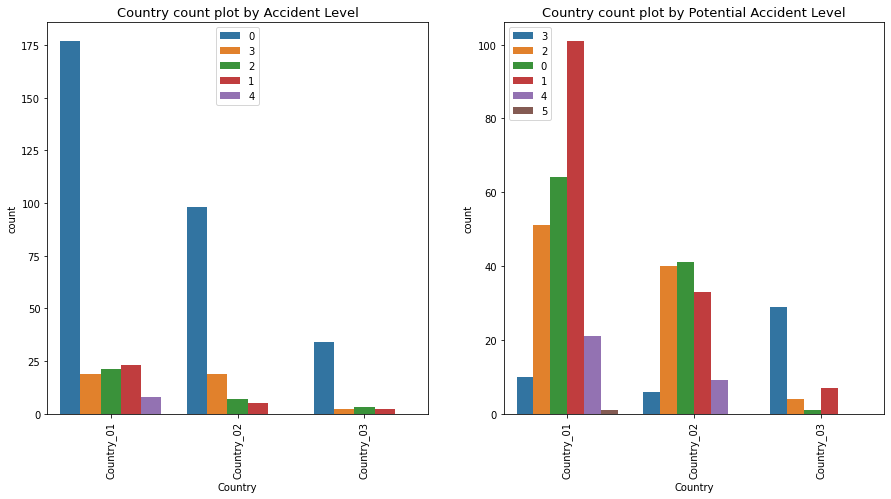

In [27]:
# Country vs Accident and Potential Accident Level
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Country', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Country'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Country' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Country'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

**Country Vs Accident Level**

Accident level 0 is highest in all countries.

Most accidents happened in country 1.

Accident level in country 3 is lesser than other countries.
**Country Vs Potential Accident Level**

Potential Accident level 1 is highest in Country 1.

Most accidents happened in country 1.

Accident level in country 3 is lesser than other countries.

# Text Pre-processing

In [28]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
from nltk.corpus import wordnet
import string
nltk.download('stopwords')
nltk.download('wordnet')

stop=set(stopwords.words('english'))
def preprocess_text(text):
      corpus=[]
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words = [lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
data['processed_text']= preprocess_text(data['Description'])
data['processed_text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
420    [being, approximately, am, approximately, lift...
421    [the, collaborator, moved, infrastructure, off...
422    [during, environmental, monitoring, activity, ...
423    [the, employee, performed, activity, stripping...
424    [am, assistant, cleaned, floor, module, centra...
Name: processed_text, Length: 418, dtype: object

In [29]:
# Looking at the maximum length of the sentence in the Description
lt = []
for i in data['processed_text']:
  lt.append(len(i))
print('Max length of the sentence in processed_text (in list) :',max(lt))

Max length of the sentence in processed_text (in list) : 95


In [30]:
def remove_punctuation(s):
    s = ' '.join([i for i in s if i not in string.punctuation])
    return s

data['final_processed'] = data['processed_text'].apply(remove_punctuation)

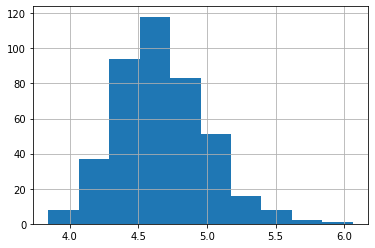

In [31]:
# Average word length of originl
data['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

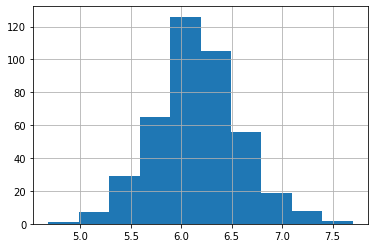

In [32]:
data['final_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

# Wordcloud

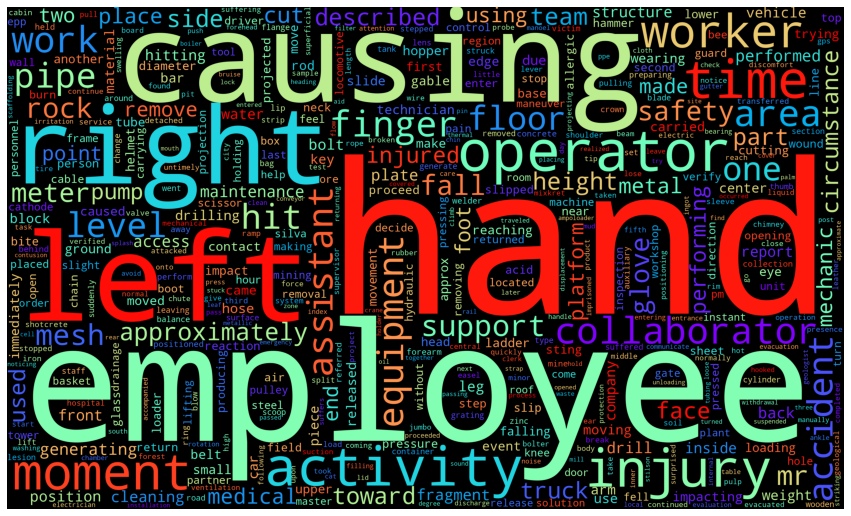

In [33]:
wordcloud = WordCloud(width = 3000, height = 1800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=500, collocations=False).generate(" ".join(data['final_processed'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = data['final_processed']
y = data['Accident Level']

cnt_vec = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xc = cnt_vec.fit_transform(X).toarray()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.20, random_state=1)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = LinearSVC( max_iter=2500)
rfc = RandomForestClassifier(random_state=1)
gbc = GradientBoostingClassifier(n_estimators=100)
xgbc = XGBClassifier()

result = {}

for model, name  in zip([svc,rfc,gbc, xgbc], ['SVC','Random Forest Classifier', 'Gradient Boosting','XGBoost']):
    result[name] = fit_n_print(model,Xc_train, Xc_test, yc_train, yc_test)  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

In [48]:
#  Use a function to automate the process of fitting multiple models.
def fit_n_print(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)  
    pred = model.predict(X_test)     
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,average='weighted')
    recall = recall_score(y_test,pred,average='weighted')
    f1 = f1_score(y_test,pred,average='weighted')

    return accuracy,precision,recall,f1

In [50]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:], 
                       columns= ['Accuracy','Precision','Recall','F1'],
                       index= result.keys()) 
result1.index.name = 'Model'

result1

,Accuracy,Precision,Recall,F1
Model,,,,
SVC,0.642857,0.441964,0.642857,0.523810
Random Forest Classifier,0.642857,0.431185,0.642857,0.516163
Gradient Boosting,0.642857,0.472680,0.642857,0.538507
XGBoost,0.654762,0.530892,0.654762,0.548552
